### 기본

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from joblib import Parallel, delayed
# 필요하다고 판단되는 라이브러리를 추가하세요.

#One-hot Encoding
from sklearn.preprocessing import MinMaxScaler

#train,test split
from sklearn.model_selection import train_test_split

#ML
from sklearn.ensemble import RandomForestClassifier

#Random search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/aivle/miniProject/project5/train_dataset.csv')

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/aivle/miniProject/project5/test_dataset.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tBodyAcc-mean()-Z                   5881 non-null   float64
 1   tBodyAcc-arCoeff()-X,2              5881 non-null   float64
 2   tBodyAcc-arCoeff()-Y,1              5881 non-null   float64
 3   tBodyAccJerk-mean()-X               5881 non-null   float64
 4   tBodyAccJerk-mean()-Y               5881 non-null   float64
 5   tBodyAccJerk-arCoeff()-X,2          5881 non-null   float64
 6   tBodyAccJerk-arCoeff()-Y,1          5881 non-null   float64
 7   tBodyAccJerk-arCoeff()-Y,3          5881 non-null   float64
 8   tBodyAccJerk-arCoeff()-Z,1          5881 non-null   float64
 9   tBodyGyro-arCoeff()-Z,3             5881 non-null   float64
 10  tBodyGyroJerk-mean()-Y              5881 non-null   float64
 11  tBodyGyroJerk-max()-Y               5881 no

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tBodyAcc-mean()-Z                   1471 non-null   float64
 1   tBodyAcc-arCoeff()-X,2              1471 non-null   float64
 2   tBodyAcc-arCoeff()-Y,1              1471 non-null   float64
 3   tBodyAccJerk-mean()-X               1471 non-null   float64
 4   tBodyAccJerk-mean()-Y               1471 non-null   float64
 5   tBodyAccJerk-arCoeff()-X,2          1471 non-null   float64
 6   tBodyAccJerk-arCoeff()-Y,1          1471 non-null   float64
 7   tBodyAccJerk-arCoeff()-Y,3          1471 non-null   float64
 8   tBodyAccJerk-arCoeff()-Z,1          1471 non-null   float64
 9   tBodyGyro-arCoeff()-Z,3             1471 non-null   float64
 10  tBodyGyroJerk-mean()-Y              1471 non-null   float64
 11  tBodyGyroJerk-max()-Y               1471 no

In [ ]:
train_data.drop('Activity',axis=1, inplace=True)

In [ ]:
train_data['Activity_dynamic'].unique()

array([4, 3, 0, 2, 1, 5])

In [ ]:
target = 'Activity_dynamic'
x = train_data.drop(target, axis=1)
y = train_data[target]

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_val)

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       192
           1       0.75      0.78      0.76       174
           2       0.81      0.77      0.79       156
           3       0.67      0.78      0.72       222
           4       0.66      0.67      0.67       235
           5       0.49      0.38      0.43       198

    accuracy                           0.69      1177
   macro avg       0.69      0.70      0.69      1177
weighted avg       0.69      0.69      0.69      1177



<Axes: xlabel='Activity_dynamic', ylabel='count'>

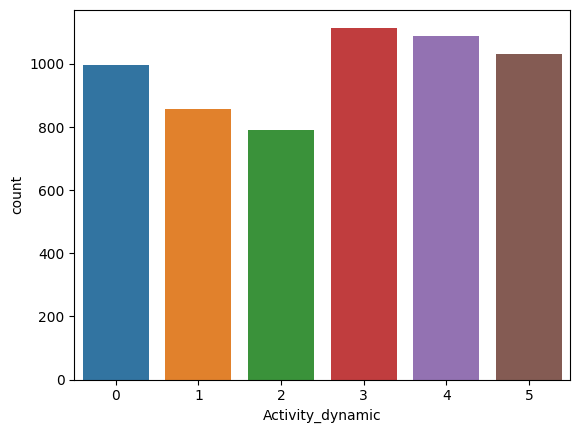

In [ ]:
sns.countplot(x="Activity_dynamic", data=train_data)

In [ ]:
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

,feature_name,feature_importance
0,fBodyBodyAccJerkMag-iqr(),0.051899
1,"fBodyAccJerk-bandsEnergy()-25,48",0.051862
2,tBodyGyroMag-energy(),0.049741
3,fBodyBodyAccJerkMag-entropy(),0.044532
4,"fBodyAccJerk-bandsEnergy()-49,64",0.036515
5,fBodyBodyGyroMag-mean(),0.035403
6,"fBodyAcc-bandsEnergy()-25,32",0.032294
7,"fBodyAccJerk-bandsEnergy()-41,48.2",0.027277
8,tBodyGyroJerk-max()-Y,0.025290
9,tBodyAccJerkMag-min(),0.024282


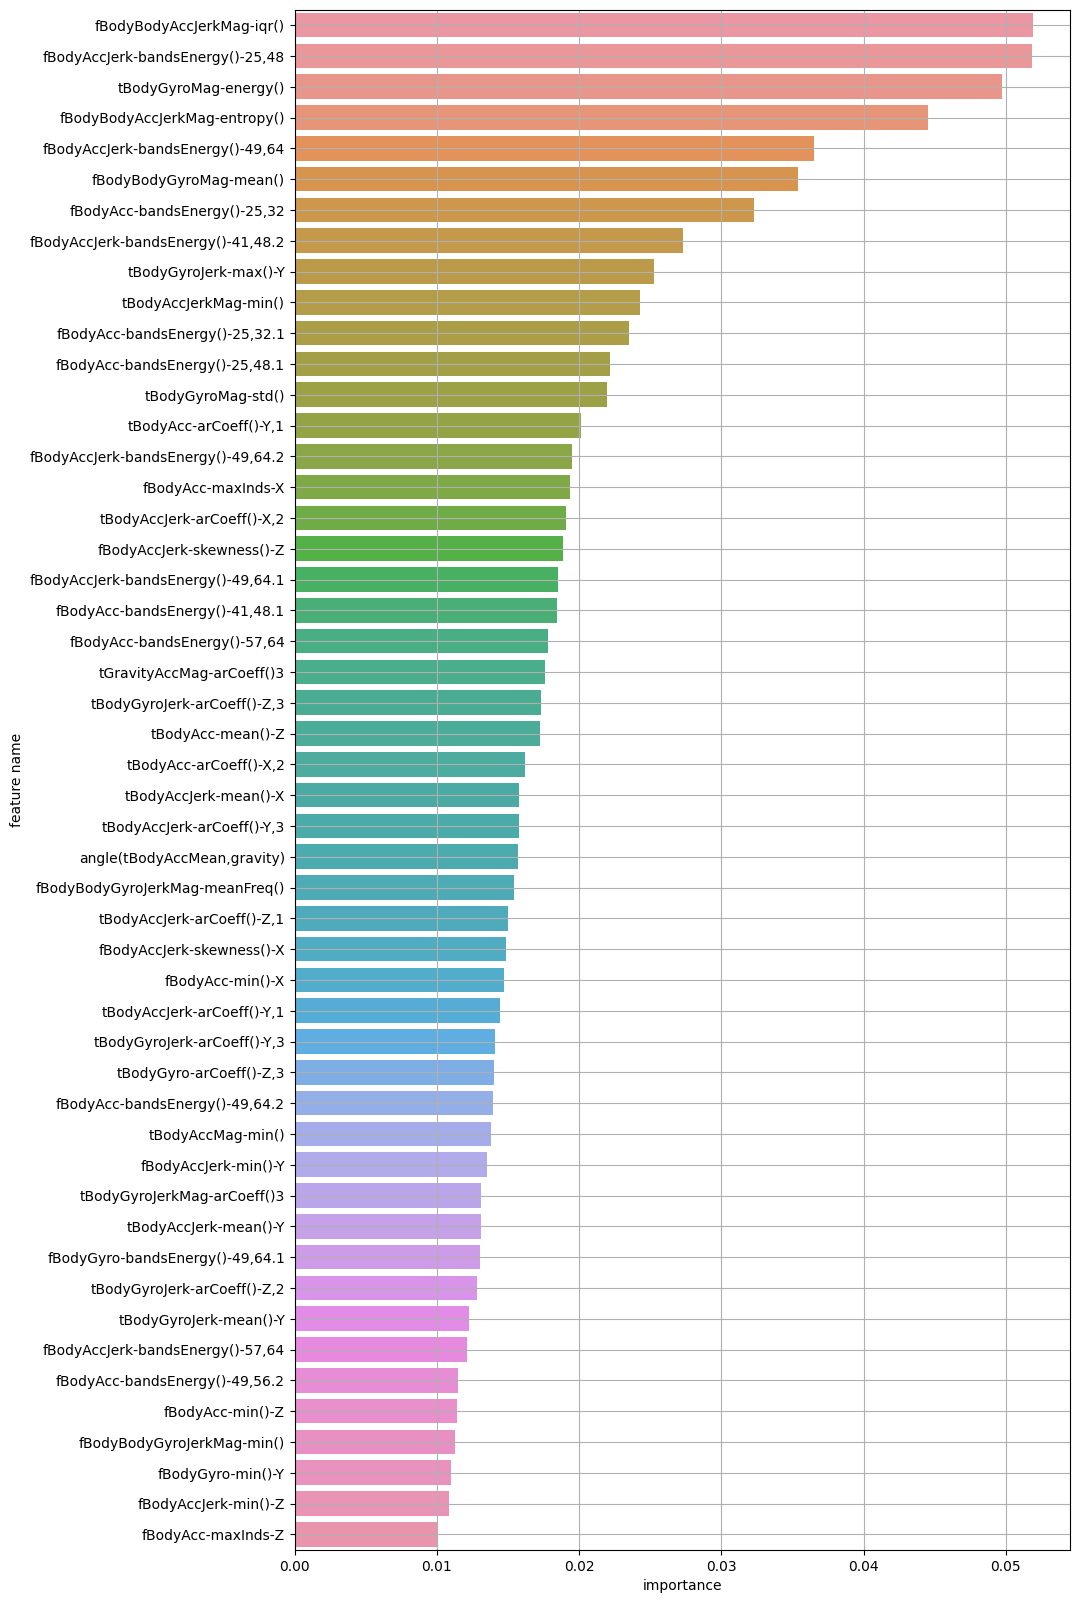

In [ ]:
plot_feature_importance(model.feature_importances_, x_train.columns, result_only = False, topn = 'all')

In [ ]:
model_dt = RandomForestClassifier(random_state=1)

In [ ]:
param ={
    'max_depth':range(1,51),
    # 'n_estimators':range(1,51),
    # 'min_samples_leaf':range(1,51),
    # 'min_samples_split':range(1,51)
    
}

In [ ]:
# model = RandomizedSearchCV(model_dt, param,cv=5,n_iter=20,scoring='accuracy')
model = GridSearchCV(model_dt, param, cv=5, scoring='accuracy')

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

In [ ]:
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[0.35948131 0.52933231 0.5714265  0.59672485 0.61139281 0.63413842
 0.65199855 0.6670882  0.67750379 0.6760185  0.68685758 0.68473286
 0.69196238 0.68834603 0.68940896 0.69217446 0.69663961 0.69111109
 0.68962489 0.69280869 0.68792321 0.69068601 0.68792186 0.68792208
 0.68877292 0.69026025 0.69004771 0.68941009 0.68941009 0.68941009
 0.68941009 0.68941009 0.68941009 0.68941009 0.68941009 0.68941009
 0.68941009 0.68941009 0.68941009 0.68941009 0.68941009 0.68941009
 0.68941009 0.68941009 0.68941009 0.68941009 0.68941009 0.68941009
 0.68941009 0.68941009]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 17}
--------------------------------------------------------------------------------
최고성능: 0.6966396092884437


### 중요한 feature 추출
- train_data를 RFECV로 추출하기(개수는 알아서 추출하도록)
- 어제 데이터에서 RFECV로 추출한 다음 오늘 데이터의 column과 비교

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
estimator = RandomForestClassifier(random_state=1)

In [ ]:
rfecv = RFECV(estimator, step=1, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
rfecv.fit(x, y)

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.


RFECV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
      scoring='accuracy', verbose=1)

In [ ]:
x_selected = rfecv.transform(x)

In [ ]:
x_selected = pd.DataFrame(x_selected)

In [ ]:
selected_features = x.columns[rfecv.support_]
print(selected_features)


Index(['tBodyAcc-mean()-Z', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAccJerk-mean()-X', 'tBodyAccJerk-arCoeff()-X,2',
       'tBodyAccJerk-arCoeff()-Z,1', 'tBodyGyro-arCoeff()-Z,3',
       'tBodyGyroJerk-max()-Y', 'tBodyGyroJerk-arCoeff()-Y,3',
       'tBodyGyroJerk-arCoeff()-Z,3', 'tBodyAccMag-min()',
       'tGravityAccMag-arCoeff()3', 'tBodyAccJerkMag-min()',
       'tBodyGyroMag-std()', 'tBodyGyroMag-energy()',
       'tBodyGyroJerkMag-arCoeff()3', 'fBodyAcc-maxInds-X',
       'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-57,64',
       'fBodyAcc-bandsEnergy()-25,32.1', 'fBodyAcc-bandsEnergy()-41,48.1',
       'fBodyAcc-bandsEnergy()-25,48.1', 'fBodyAccJerk-skewness()-X',
       'fBodyAccJerk-skewness()-Z', 'fBodyAccJerk-bandsEnergy()-49,64',
       'fBodyAccJerk-bandsEnergy()-25,48',
       'fBodyAccJerk-bandsEnergy()-49,64.1',
       'fBodyAccJerk-bandsEnergy()-41,48.2',
       'fBodyAccJerk-bandsEnergy()-49,64.2', 'fBodyBodyAccJerkMag-iqr()',
  

In [ ]:
feature_importance = pd.Series(rfecv.ranking_, index=x.columns)
print(feature_importance.sort_values(ascending=True))

tBodyAcc-mean()-Z                      1
fBodyBodyGyroJerkMag-meanFreq()        1
fBodyAcc-bandsEnergy()-25,32           1
fBodyAcc-bandsEnergy()-57,64           1
fBodyAcc-bandsEnergy()-25,32.1         1
fBodyAcc-bandsEnergy()-41,48.1         1
fBodyAcc-bandsEnergy()-25,48.1         1
fBodyAccJerk-skewness()-X              1
fBodyAcc-maxInds-X                     1
fBodyAccJerk-skewness()-Z              1
fBodyAccJerk-bandsEnergy()-25,48       1
fBodyAccJerk-bandsEnergy()-49,64.1     1
fBodyAccJerk-bandsEnergy()-41,48.2     1
fBodyAccJerk-bandsEnergy()-49,64.2     1
fBodyBodyAccJerkMag-iqr()              1
fBodyBodyAccJerkMag-entropy()          1
fBodyBodyGyroMag-mean()                1
fBodyAccJerk-bandsEnergy()-49,64       1
tBodyGyroJerkMag-arCoeff()3            1
angle(tBodyAccMean,gravity)            1
tBodyGyroMag-std()                     1
tBodyGyro-arCoeff()-Z,3                1
tBodyGyroMag-energy()                  1
tBodyAccJerk-arCoeff()-X,2             1
tBodyAccJerk-mea

In [ ]:
selected_x_train = x_train[selected_features]
selected_x_val = x_val[selected_features]

In [ ]:
# 선택된 feature subset 확인
selected_x_train = x_train[selected_features]
print("Selected Features:", selected_x_train.shape)

# 선택된 feature subset으로 모델 학습 및 예측
model.fit(selected_x_train, y_train)

Selected Features: (4704, 34)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

In [ ]:
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[0.35990639 0.54697809 0.57355281 0.599489   0.61181902 0.63584078
 0.64731974 0.65964773 0.66879146 0.6766586  0.69175006 0.69302621
 0.6898372  0.69345219 0.69599928 0.69791507 0.70365546 0.7045063
 0.70217017 0.70599475 0.69897777 0.70514482 0.70514414 0.70238067
 0.70365682 0.70365682 0.70344428 0.7030192  0.70323174 0.70280666
 0.70280666 0.70280666 0.70280666 0.70280666 0.70280666 0.70280666
 0.70280666 0.70280666 0.70280666 0.70280666 0.70280666 0.70280666
 0.70280666 0.70280666 0.70280666 0.70280666 0.70280666 0.70280666
 0.70280666 0.70280666]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 20}
--------------------------------------------------------------------------------
최고성능: 0.7059947543355869


In [ ]:
selected_x_val = x_val[selected_features]
y_pred = model.predict(selected_x_val )

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       192
           1       0.78      0.77      0.77       174
           2       0.79      0.76      0.78       156
           3       0.67      0.79      0.73       222
           4       0.67      0.63      0.65       235
           5       0.51      0.43      0.47       198

    accuracy                           0.70      1177
   macro avg       0.70      0.70      0.70      1177
weighted avg       0.69      0.70      0.69      1177



In [ ]:
x_test =  pd.read_csv('/content/drive/MyDrive/aivle/miniProject/project5/test_dataset.csv')

In [ ]:
selected_x_test = x_test[selected_features]

### Feature Extraction + AutoML(AutoGluon)

In [ ]:
!python -m pip install --upgrade pip
!python -m pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 40.4 MB/s eta 0:00

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.core as ag

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/aivle/miniProject/project5/train_dataset.csv')
test_data =pd.read_csv('/content/drive/MyDrive/aivle/miniProject/project5/test_dataset.csv')
data.drop('Activity', axis=1, inplace=True)

In [ ]:
target='Activity_dynamic'
sel_col = list(selected_features)
sel_col.append(target)
sel_col

['tBodyAcc-mean()-Z',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAccJerk-mean()-X',
 'tBodyAccJerk-arCoeff()-X,2',
 'tBodyAccJerk-arCoeff()-Z,1',
 'tBodyGyro-arCoeff()-Z,3',
 'tBodyGyroJerk-max()-Y',
 'tBodyGyroJerk-arCoeff()-Y,3',
 'tBodyGyroJerk-arCoeff()-Z,3',
 'tBodyAccMag-min()',
 'tGravityAccMag-arCoeff()3',
 'tBodyAccJerkMag-min()',
 'tBodyGyroMag-std()',
 'tBodyGyroMag-energy()',
 'tBodyGyroJerkMag-arCoeff()3',
 'fBodyAcc-maxInds-X',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-25,32.1',
 'fBodyAcc-bandsEnergy()-41,48.1',
 'fBodyAcc-bandsEnergy()-25,48.1',
 'fBodyAccJerk-skewness()-X',
 'fBodyAccJerk-skewness()-Z',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-49,64.1',
 'fBodyAccJerk-bandsEnergy()-41,48.2',
 'fBodyAccJerk-bandsEnergy()-49,64.2',
 'fBodyBodyAccJerkMag-iqr()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyBodyGyroMag-mean()',
 'fBodyBodyGyroJerkMag

In [ ]:
data = data[sel_col]

In [ ]:
train_data = TabularDataset(data)
train_data.head()

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",tBodyGyroJerk-max()-Y,"tBodyGyroJerk-arCoeff()-Y,3","tBodyGyroJerk-arCoeff()-Z,3",...,"fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-49,64.1","fBodyAccJerk-bandsEnergy()-41,48.2","fBodyAccJerk-bandsEnergy()-49,64.2",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",Activity_dynamic
0,-0.103362,-0.094784,-0.109208,0.068584,0.198600,-0.058315,0.354270,-0.990735,-0.091233,0.056517,...,-0.999652,-0.999901,-0.999669,-0.999719,-0.985141,-1.000000,-0.975435,-0.032207,-0.042494,4
1,-0.098163,-0.052478,0.464764,0.075947,0.130310,0.011987,0.503466,-0.987249,0.142911,0.463343,...,-0.999843,-0.999765,-0.999818,-0.999583,-0.988982,-1.000000,-0.978534,-0.246705,-0.062899,3
2,-0.108717,-0.226718,0.301165,0.079530,0.111340,0.314589,0.132061,-0.995887,0.487325,0.153453,...,-0.999857,-0.999333,-0.999566,-0.999278,-0.991535,-1.000000,-0.991953,0.388765,0.000265,4
3,-0.150354,0.549363,-0.384117,-0.309509,0.411714,-0.259441,-0.711894,-0.717070,-0.044750,-0.245860,...,-0.798628,-0.815255,-0.940882,-0.847997,-0.387366,0.323260,-0.479590,0.050888,-0.255125,0
4,0.091229,-0.091537,-0.610793,0.584212,-0.248696,-0.240501,-0.305964,-0.775869,-0.151482,-0.238688,...,-0.708120,-0.962572,-0.983249,-0.927245,-0.220963,0.446385,-0.433366,-0.013902,-0.044344,2


In [ ]:
label = 'Activity_dynamic'

In [ ]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20230414_040725/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230414_040725/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    5881
Train Data Columns: 34
Label Column: Activity_dynamic
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	6 unique label values:  [4, 3, 0, 2, 1, 5]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 6
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12419.33 MB

[1000]	valid_set's multi_error: 0.212224


	0.7878	 = Validation score   (accuracy)
	47.99s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.8132	 = Validation score   (accuracy)
	0.77s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 280.59s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230414_040725/")


In [ ]:
test = test_data[selected_features]

In [ ]:
y_pred = predictor.predict(test)

In [ ]:
submit = pd.DataFrame(y_pred)
submit.reset_index(inplace=True)
submit.rename(columns={'index':'id','Activity_dynamic':'Activity'}, inplace=True)
submit.to_csv('/content/drive/MyDrive/aivle/miniProject/project5/jh_autogloun_fn.csv',index=False)

### RFE + autoML

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# rfecv = RFECV(estimator, step=1, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
rfe = RFE(estimator, step=1,verbose=1)

In [ ]:
rfe.fit(x,y)

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.


RFE(estimator=RandomForestClassifier(random_state=1), verbose=1)

In [ ]:
print(rfe.support_)

[ True  True  True False False  True False False False False False  True
 False False  True False  True  True  True  True False False False  True
 False  True  True False  True  True False False False False False  True
 False  True  True  True  True  True False False  True  True  True False
  True False]


In [ ]:
features_rfe = x.columns[rfe.support_]
print(features_rfe)

Index(['tBodyAcc-mean()-Z', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAccJerk-arCoeff()-X,2', 'tBodyGyroJerk-max()-Y',
       'tBodyGyroJerk-arCoeff()-Z,3', 'tGravityAccMag-arCoeff()3',
       'tBodyAccJerkMag-min()', 'tBodyGyroMag-std()', 'tBodyGyroMag-energy()',
       'fBodyAcc-maxInds-X', 'fBodyAcc-bandsEnergy()-25,32',
       'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-41,48.1',
       'fBodyAcc-bandsEnergy()-25,48.1', 'fBodyAccJerk-skewness()-Z',
       'fBodyAccJerk-bandsEnergy()-49,64', 'fBodyAccJerk-bandsEnergy()-25,48',
       'fBodyAccJerk-bandsEnergy()-49,64.1',
       'fBodyAccJerk-bandsEnergy()-41,48.2',
       'fBodyAccJerk-bandsEnergy()-49,64.2', 'fBodyBodyAccJerkMag-iqr()',
       'fBodyBodyAccJerkMag-entropy()', 'fBodyBodyGyroMag-mean()',
       'fBodyBodyGyroJerkMag-meanFreq()'],
      dtype='object')


In [ ]:
rfe_x_train = x_train[features_rfe]
rfe_x_val = x_val[features_rfe]

In [ ]:
model.fit(rfe_x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(1, 51)}, scoring='accuracy')

In [ ]:
y_pred_rfe = model.predict(rfe_x_val)

In [ ]:
print(classification_report(y_val, y_pred_rfe))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       192
           1       0.78      0.78      0.78       174
           2       0.79      0.76      0.78       156
           3       0.71      0.79      0.75       222
           4       0.68      0.66      0.67       235
           5       0.54      0.48      0.51       198

    accuracy                           0.71      1177
   macro avg       0.71      0.71      0.71      1177
weighted avg       0.70      0.71      0.70      1177



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/aivle/miniProject/project5/train_dataset.csv')
test_data =pd.read_csv('/content/drive/MyDrive/aivle/miniProject/project5/test_dataset.csv')
data.drop('Activity', axis=1, inplace=True)

In [ ]:
target='Activity_dynamic'
sel_col = list(features_rfe)
sel_col.append(target)
sel_col

['tBodyAcc-mean()-Z',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAccJerk-arCoeff()-X,2',
 'tBodyGyroJerk-max()-Y',
 'tBodyGyroJerk-arCoeff()-Z,3',
 'tGravityAccMag-arCoeff()3',
 'tBodyAccJerkMag-min()',
 'tBodyGyroMag-std()',
 'tBodyGyroMag-energy()',
 'fBodyAcc-maxInds-X',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-41,48.1',
 'fBodyAcc-bandsEnergy()-25,48.1',
 'fBodyAccJerk-skewness()-Z',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-49,64.1',
 'fBodyAccJerk-bandsEnergy()-41,48.2',
 'fBodyAccJerk-bandsEnergy()-49,64.2',
 'fBodyBodyAccJerkMag-iqr()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyBodyGyroMag-mean()',
 'fBodyBodyGyroJerkMag-meanFreq()',
 'Activity_dynamic']

In [ ]:
data_rfe = data[sel_col]

In [ ]:
train_data = TabularDataset(data_rfe)
train_data.head()

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-X,2",tBodyGyroJerk-max()-Y,"tBodyGyroJerk-arCoeff()-Z,3",tGravityAccMag-arCoeff()3,tBodyAccJerkMag-min(),tBodyGyroMag-std(),tBodyGyroMag-energy(),...,"fBodyAccJerk-bandsEnergy()-49,64","fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-49,64.1","fBodyAccJerk-bandsEnergy()-41,48.2","fBodyAccJerk-bandsEnergy()-49,64.2",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-meanFreq(),Activity_dynamic
0,-0.103362,-0.094784,-0.109208,0.198600,-0.990735,0.056517,0.003566,-0.992957,-0.970071,-0.999480,...,-0.999856,-0.999652,-0.999901,-0.999669,-0.999719,-0.985141,-1.000000,-0.975435,-0.032207,4
1,-0.098163,-0.052478,0.464764,0.130310,-0.987249,0.463343,0.411821,-0.988006,-0.974138,-0.999709,...,-0.999877,-0.999843,-0.999765,-0.999818,-0.999583,-0.988982,-1.000000,-0.978534,-0.246705,3
2,-0.108717,-0.226718,0.301165,0.111340,-0.995887,0.153453,-0.040425,-0.975360,-0.992006,-0.999914,...,-0.999933,-0.999857,-0.999333,-0.999566,-0.999278,-0.991535,-1.000000,-0.991953,0.388765,4
3,-0.150354,0.549363,-0.384117,0.411714,-0.717070,-0.245860,0.065009,-0.463019,-0.453516,-0.739338,...,-0.958203,-0.798628,-0.815255,-0.940882,-0.847997,-0.387366,0.323260,-0.479590,0.050888,0
4,0.091229,-0.091537,-0.610793,-0.248696,-0.775869,-0.238688,0.082039,-0.677852,-0.246889,-0.571759,...,-0.740499,-0.708120,-0.962572,-0.983249,-0.927245,-0.220963,0.446385,-0.433366,-0.013902,2


In [ ]:
label = 'Activity_dynamic'

In [ ]:
train,valid = train_test_split(train_data, test_size=0.2, random_state=1)

In [ ]:
#공식문서에 나온 hyperparameter tunning code

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 50,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=5, upper=100, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

# time_limit = 2*60  # train various models for ~2 min
num_trials = 10  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [ ]:
predictor = TabularPredictor(label=label).fit(train, tuning_data=valid,hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,)

Fitted model: NeuralNetTorch/6544eb4b ...
	0.7239	 = Validation score   (accuracy)
	16.25s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: NeuralNetTorch/e6939ad9 ...
	0.7171	 = Validation score   (accuracy)
	38.95s	 = Training   runtime
	0.11s	 = Validation runtime
Fitted model: NeuralNetTorch/2a500f50 ...
	0.6304	 = Validation score   (accuracy)
	22.18s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/c95d30e7 ...
	0.6712	 = Validation score   (accuracy)
	35.6s	 = Training   runtime
	0.13s	 = Validation runtime
Fitted model: NeuralNetTorch/818d3e6e ...
	0.6347	 = Validation score   (accuracy)
	40.72s	 = Training   runtime
	0.07s	 = Validation runtime
Fitted model: NeuralNetTorch/55a49c95 ...
	0.6737	 = Validation score   (accuracy)
	21.16s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/f21efabd ...
	0.6703	 = Validation score   (accuracy)
	12.26s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted 

In [ ]:
test_rfe = test_data[features_rfe]
y_pred = predictor.predict(test_rfe)

In [ ]:
submit = pd.DataFrame(y_pred)
submit.reset_index(inplace=True)
submit.rename(columns={'index':'id','Activity_dynamic':'Activity'}, inplace=True)
submit.to_csv('/content/drive/MyDrive/aivle/miniProject/project5/jh_autogloun_tuning.csv',index=False)

### RFECV +  Hyperparameter tuning

In [82]:
train_data

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-X,2",tBodyGyroJerk-max()-Y,"tBodyGyroJerk-arCoeff()-Z,3",tGravityAccMag-arCoeff()3,tBodyAccJerkMag-min(),tBodyGyroMag-std(),tBodyGyroMag-energy(),...,"fBodyAccJerk-bandsEnergy()-49,64","fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-49,64.1","fBodyAccJerk-bandsEnergy()-41,48.2","fBodyAccJerk-bandsEnergy()-49,64.2",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-meanFreq(),Activity_dynamic
0,-0.103362,-0.094784,-0.109208,0.198600,-0.990735,0.056517,0.003566,-0.992957,-0.970071,-0.999480,...,-0.999856,-0.999652,-0.999901,-0.999669,-0.999719,-0.985141,-1.000000,-0.975435,-0.032207,4
1,-0.098163,-0.052478,0.464764,0.130310,-0.987249,0.463343,0.411821,-0.988006,-0.974138,-0.999709,...,-0.999877,-0.999843,-0.999765,-0.999818,-0.999583,-0.988982,-1.000000,-0.978534,-0.246705,3
2,-0.108717,-0.226718,0.301165,0.111340,-0.995887,0.153453,-0.040425,-0.975360,-0.992006,-0.999914,...,-0.999933,-0.999857,-0.999333,-0.999566,-0.999278,-0.991535,-1.000000,-0.991953,0.388765,4
3,-0.150354,0.549363,-0.384117,0.411714,-0.717070,-0.245860,0.065009,-0.463019,-0.453516,-0.739338,...,-0.958203,-0.798628,-0.815255,-0.940882,-0.847997,-0.387366,0.323260,-0.479590,0.050888,0
4,0.091229,-0.091537,-0.610793,-0.248696,-0.775869,-0.238688,0.082039,-0.677852,-0.246889,-0.571759,...,-0.740499,-0.708120,-0.962572,-0.983249,-0.927245,-0.220963,0.446385,-0.433366,-0.013902,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.131974,-0.059080,0.000441,0.180157,-0.990256,0.407890,-0.097408,-0.978095,-0.974275,-0.999373,...,-0.999932,-0.999809,-0.999528,-0.999479,-0.998932,-0.987428,-1.000000,-0.981119,0.052914,5
5877,-0.105174,0.275170,-0.191391,0.168315,-0.834894,-0.237089,-0.155736,-0.641976,-0.200862,-0.614591,...,-0.924840,-0.842470,-0.911741,-0.956513,-0.933058,-0.561358,0.241367,-0.415217,0.325461,1
5878,-0.107440,-0.025156,0.407618,0.222424,-0.991030,0.270809,0.496631,-0.970816,-0.991276,-0.999883,...,-0.999919,-0.999566,-0.999514,-0.999504,-0.999818,-0.989684,-1.000000,-0.991452,0.362439,3
5879,-0.121001,0.686123,-0.606018,0.499451,-0.708190,0.108851,-0.410450,-0.688977,-0.378939,-0.720597,...,-0.949151,-0.775048,-0.940471,-0.959061,-0.977266,-0.465531,0.323401,-0.504324,0.031915,1


In [83]:
target='Activity_dynamic'
sel_col = list(selected_features)
sel_col.append(target)
sel_col

['tBodyAcc-mean()-Z',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAccJerk-mean()-X',
 'tBodyAccJerk-arCoeff()-X,2',
 'tBodyAccJerk-arCoeff()-Z,1',
 'tBodyGyro-arCoeff()-Z,3',
 'tBodyGyroJerk-max()-Y',
 'tBodyGyroJerk-arCoeff()-Y,3',
 'tBodyGyroJerk-arCoeff()-Z,3',
 'tBodyAccMag-min()',
 'tGravityAccMag-arCoeff()3',
 'tBodyAccJerkMag-min()',
 'tBodyGyroMag-std()',
 'tBodyGyroMag-energy()',
 'tBodyGyroJerkMag-arCoeff()3',
 'fBodyAcc-maxInds-X',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-25,32.1',
 'fBodyAcc-bandsEnergy()-41,48.1',
 'fBodyAcc-bandsEnergy()-25,48.1',
 'fBodyAccJerk-skewness()-X',
 'fBodyAccJerk-skewness()-Z',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-49,64.1',
 'fBodyAccJerk-bandsEnergy()-41,48.2',
 'fBodyAccJerk-bandsEnergy()-49,64.2',
 'fBodyBodyAccJerkMag-iqr()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyBodyGyroMag-mean()',
 'fBodyBodyGyroJerkMag

In [84]:
data = data[sel_col]

In [85]:
train_data = TabularDataset(data)
train_data.head()

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",tBodyGyroJerk-max()-Y,"tBodyGyroJerk-arCoeff()-Y,3","tBodyGyroJerk-arCoeff()-Z,3",...,"fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-49,64.1","fBodyAccJerk-bandsEnergy()-41,48.2","fBodyAccJerk-bandsEnergy()-49,64.2",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",Activity_dynamic
0,-0.103362,-0.094784,-0.109208,0.068584,0.198600,-0.058315,0.354270,-0.990735,-0.091233,0.056517,...,-0.999652,-0.999901,-0.999669,-0.999719,-0.985141,-1.000000,-0.975435,-0.032207,-0.042494,4
1,-0.098163,-0.052478,0.464764,0.075947,0.130310,0.011987,0.503466,-0.987249,0.142911,0.463343,...,-0.999843,-0.999765,-0.999818,-0.999583,-0.988982,-1.000000,-0.978534,-0.246705,-0.062899,3
2,-0.108717,-0.226718,0.301165,0.079530,0.111340,0.314589,0.132061,-0.995887,0.487325,0.153453,...,-0.999857,-0.999333,-0.999566,-0.999278,-0.991535,-1.000000,-0.991953,0.388765,0.000265,4
3,-0.150354,0.549363,-0.384117,-0.309509,0.411714,-0.259441,-0.711894,-0.717070,-0.044750,-0.245860,...,-0.798628,-0.815255,-0.940882,-0.847997,-0.387366,0.323260,-0.479590,0.050888,-0.255125,0
4,0.091229,-0.091537,-0.610793,0.584212,-0.248696,-0.240501,-0.305964,-0.775869,-0.151482,-0.238688,...,-0.708120,-0.962572,-0.983249,-0.927245,-0.220963,0.446385,-0.433366,-0.013902,-0.044344,2


In [86]:
train,valid = train_test_split(train_data, test_size=0.2, random_state=1)

In [91]:
predictor = TabularPredictor(label=label, eval_metric='f1_macro').fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20230414_062140/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230414_062140/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    5881
Train Data Columns: 34
Label Column: Activity_dynamic
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	6 unique label values:  [4, 3, 0, 2, 1, 5]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 6
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11316.55 MB

[1000]	valid_set's multi_logloss: 0.851714	valid_set's f1_macro: 0.788185


	0.7882	 = Validation score   (f1_macro)
	55.17s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.8145	 = Validation score   (f1_macro)
	2.11s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 504.98s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230414_062140/")


In [92]:
test = test_data[selected_features]
y_pred = predictor.predict(test)

In [93]:
submit = pd.DataFrame(y_pred)
submit.reset_index(inplace=True)
submit.rename(columns={'index':'id','Activity_dynamic':'Activity'}, inplace=True)
submit.to_csv('/content/drive/MyDrive/aivle/miniProject/project5/jh_autogloun_rfecv_tune.csv',index=False)